### 超參數&模型驗證

#### 錯誤的模型驗證方式

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

錯誤原因: 訓練集跟測試集使用同一組資料

#### Holdout Sets

In [4]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

model.fit(X1, y1)

y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

#### Cross Validation

In [5]:
#　two-fold cross-validation: 把資料切成2個子集，然後輪流作為驗證用資料集
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5) # 切成五組，每組輪流當驗證集

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [8]:
# 每次只留一筆資料當驗證集
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
scores.mean()

0.96

##### 如果評估之後效能不好，如何改進
- 使用其他模型
- 收集更多訓練樣本
- 增加每個樣本的特徵

**Coefficient of determination:** https://en.wikipedia.org/wiki/Coefficient_of_determination
- 1: 完美符合
- 0: 模型不會比簡單拿取資料的平均值還要好
- 負值: 模型很糟

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [11]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

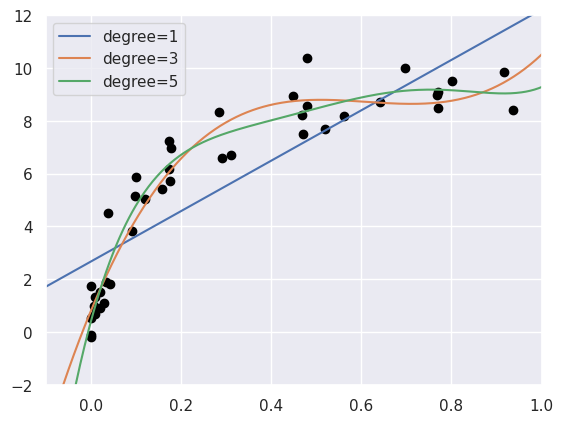

In [12]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color="black")
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label=f"degree={degree}")

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc="best")

Text(0, 0.5, 'score')

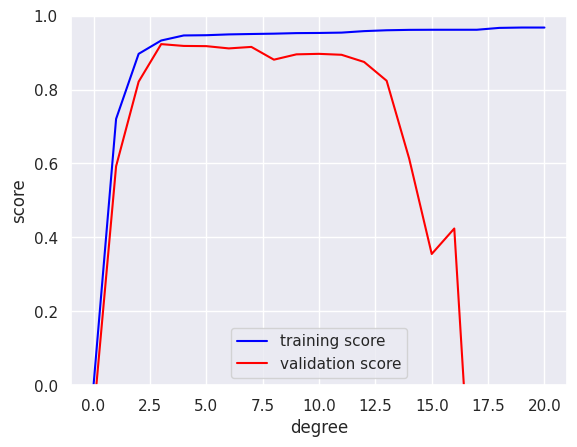

In [21]:
from sklearn.model_selection import validation_curve
degree = np.arange(21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color="blue", label="training score")
plt.plot(degree, np.median(val_score, 1), color="red", label="validation score")
plt.legend(loc="best")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

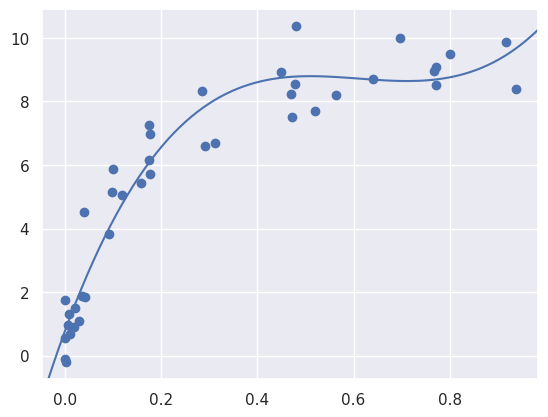

In [22]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

#### 學習曲線

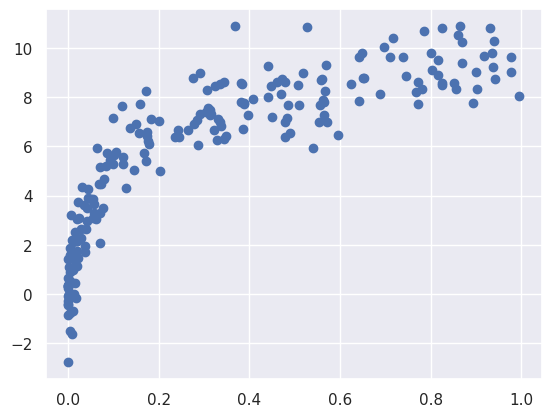

In [23]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

Text(0, 0.5, 'score')

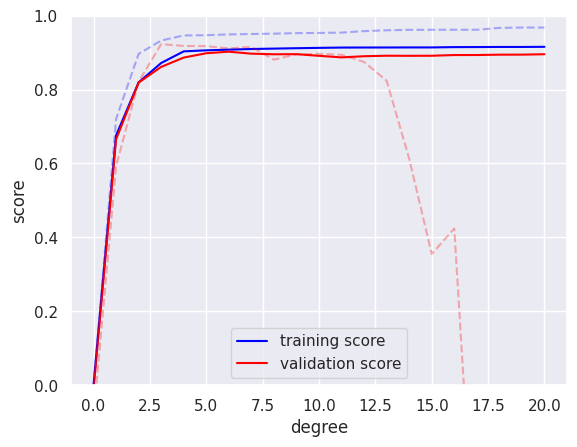

In [24]:
from sklearn.model_selection import validation_curve
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color="blue", label="training score")
plt.plot(degree, np.median(val_score2, 1), color="red", label="validation score")
plt.plot(degree, np.median(train_score, 1), color="blue", alpha=0.3,
         linestyle="dashed")
plt.plot(degree, np.median(val_score, 1), color="red", alpha=0.3,
         linestyle="dashed")
plt.legend(loc="lower center")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")

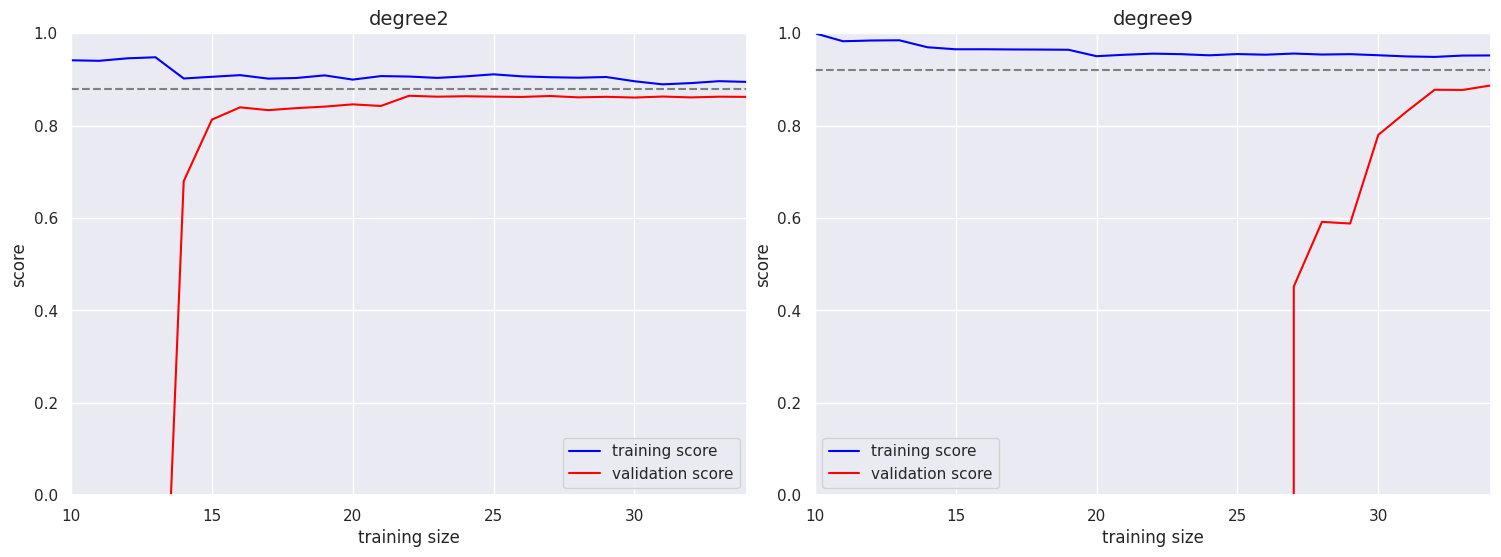

In [27]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color="blue", label="training score")
    ax[i].plot(N, np.mean(val_lc, 1), color="red", label="validation score")
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color="gray",
                 linestyle="dashed")
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel("training size")
    ax[i].set_ylabel("score")
    ax[i].set_title(f"degree{degree}", size=14)
    ax[i].legend(loc="best")


#### Grid Search

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "polynomialfeatures__degree": np.arange(21),
    "linearregression__fit_intercept": [True, False],
}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [31]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [32]:
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

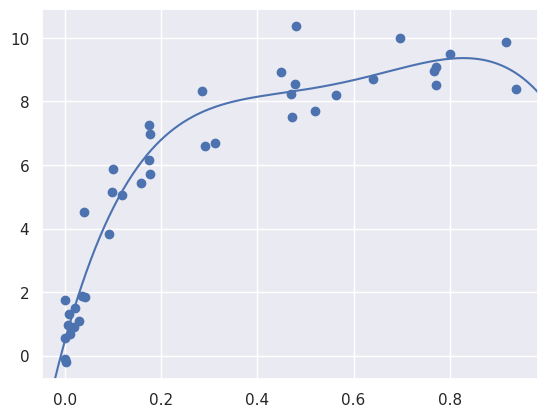

In [34]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)